In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jupyter
pl = pd.read_csv("EPL Standings 2000-2022.csv") 
pd.set_option('display.max_colwidth',None)
sp = lambda x : int(x.split("-")[0])
pl["Season"] =pl["Season"].apply(sp)
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    int64 
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(10), object(2)
memory usage: 41.4+ KB


In [135]:
# getting the teams that qualified to champions league and the teams that relegated 
def final_stat(x):
    if "Champions League" in x:
        return "Champions League"
    elif "Relegation" in x :
        return "Relegation"
    else :
        return None
pl["final_stat"] = pl["Qualification or relegation"].apply(final_stat)
pl.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,final_stat
0,2000,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first group stage,Champions League
1,2000,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first group stage,Champions League
2,2000,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third qualifying round[a],Champions League
3,2000,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a],None
4,2000,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a],None


In [136]:
# building a data frame that contains only the teams that qualified to the champions league
qualified = pl[pl.final_stat== "Champions League"]
qualified = qualified.drop("Qualification or relegation" , axis = 1)
qualified.head(5)

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,final_stat
0,2000,1,Manchester United,38,24,8,6,79,31,48,80,Champions League
1,2000,2,Arsenal,38,20,10,8,63,38,25,70,Champions League
2,2000,3,Liverpool,38,20,9,9,71,39,32,69,Champions League
20,2001,1,Arsenal,38,26,9,3,79,36,43,87,Champions League
21,2001,2,Liverpool,38,24,8,6,67,30,37,80,Champions League


In [137]:
# answering the question : how many point do you need in average to reach the champions league safely?
print(qualified.Pts.mean()) # you need on average 78 points.
# answering the question : how many point do you need at least on average to reach the champions league?
least = qualified[(qualified.Pos == 4 )]
print(least.Pts.mean()) # you need on average 70 points.

78.38202247191012
69.7


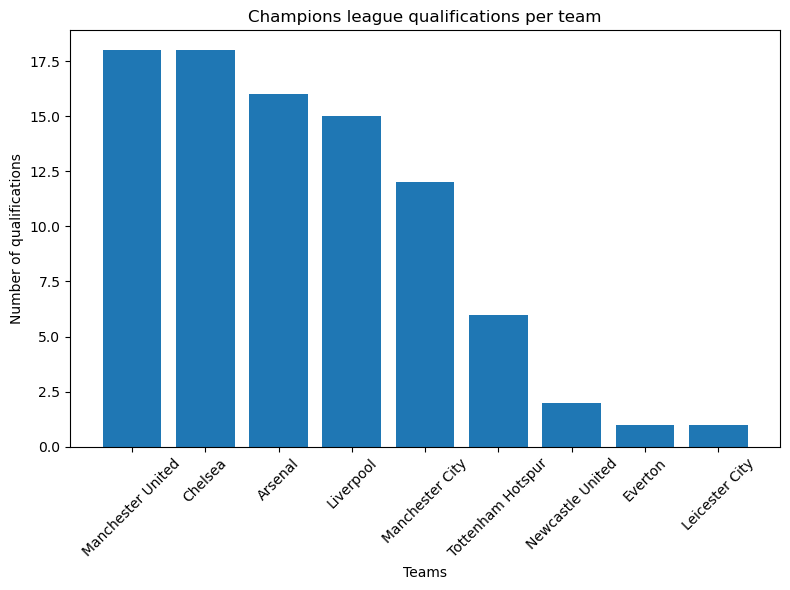

In [138]:
#plotting each teams qualification to the champions league
# Count the number of qualifications of each team
category_counts = qualified['Team'].value_counts()

# Plot a histogram
plt.figure(figsize=(8,6)) 
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Teams')
plt.ylabel('Number of qualifications')
plt.title('Champions league qualifications per team')
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()

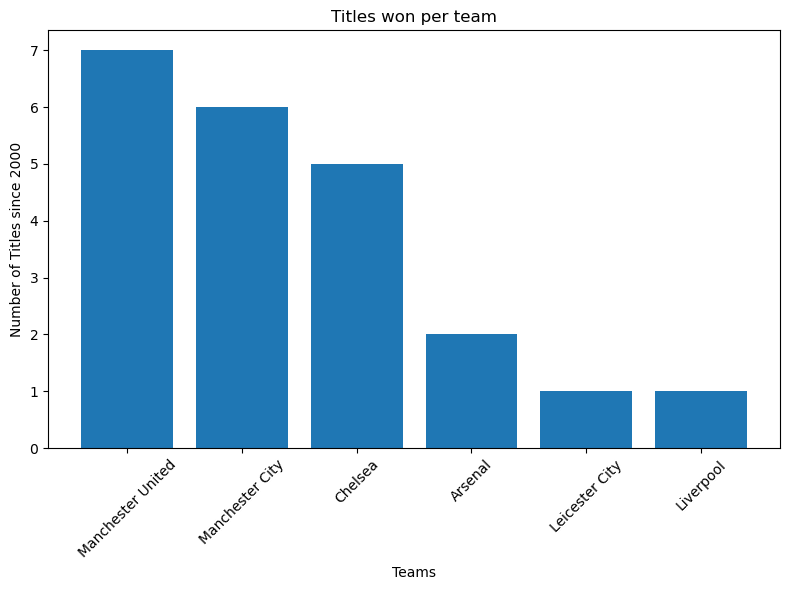

In [139]:
# looking for the most teams that won the title 
winners = pl[pl.Pos == 1]
category_counts = winners['Team'].value_counts()
plt.figure(figsize=(8,6)) 
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Teams')
plt.ylabel('Number of Titles since 2000')
plt.title('Titles won per team')
plt.xticks(rotation=45) 
plt.tight_layout()       
plt.show()

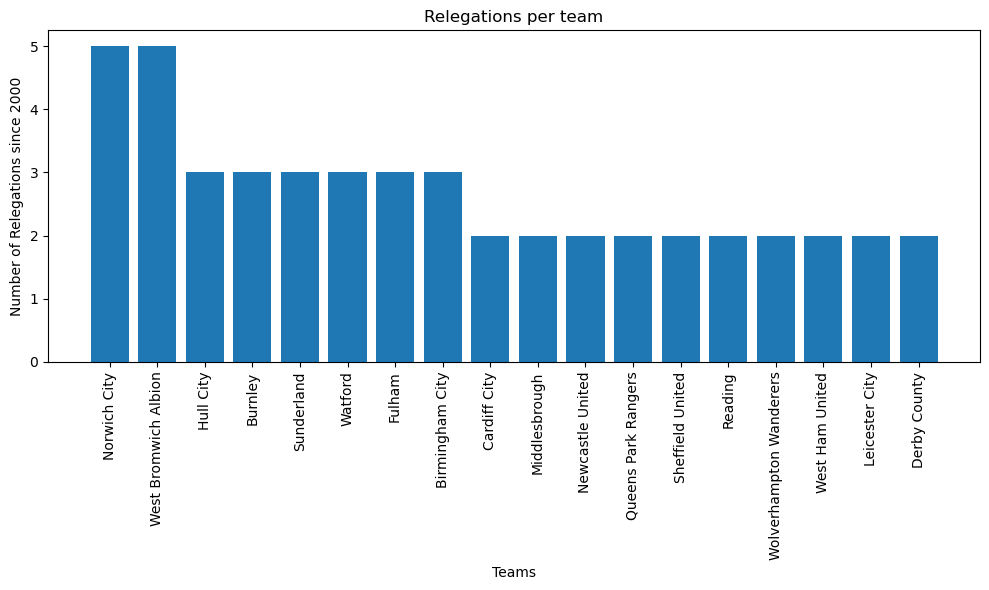

In [140]:
# looking for the teams that relegated the most
relegators = pl[pl["final_stat"] == "Relegation"]
category_counts = relegators['Team'].value_counts()
category_counts = category_counts[category_counts.values >=2 ] 
# filtering the teams that relegated more than once because they are too many and the graph is a bit retarted this way
plt.figure(figsize=(10,6)) 
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Teams')
plt.ylabel('Number of Relegations since 2000')
plt.title('Relegations per team')
plt.xticks(rotation=90) 
plt.tight_layout()       
plt.show()


In [141]:
# how much points needed to stay in the safe zone ?
print(pl[pl.Pos == 17].Pts.mean())
# you must have 38 points at least on average to stay in the EPL

37.90909090909091


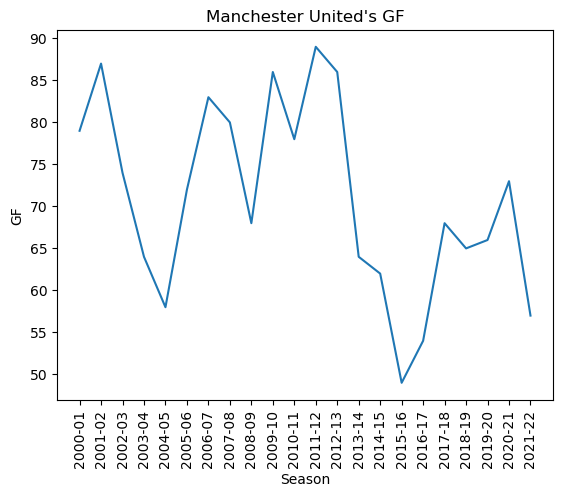

In [142]:
# this function helps you plot any stat you want about any team 
def plot_performance(team , desired_stat):
    pl = pd.read_csv("EPL Standings 2000-2022.csv") 
    this_team = pl[pl.Team == team]
    plt.plot(this_team.Season,this_team[desired_stat])
    plt.xlabel('Season')
    plt.ylabel(f'{desired_stat}')
    plt.title(team +"'s " + desired_stat)
    plt.xticks(rotation=90) 
    plt.show()
plot_performance("Manchester United","GF")

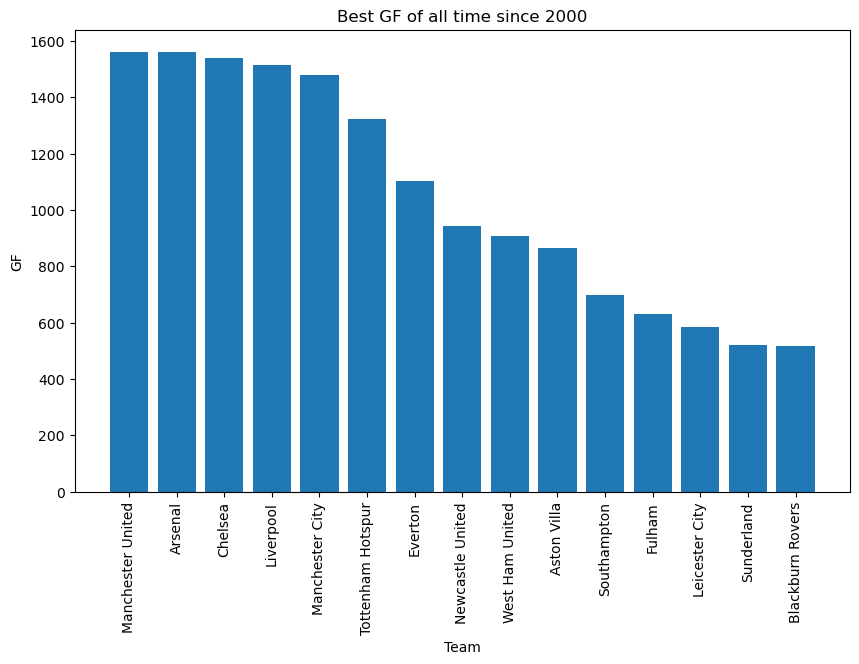

In [154]:
# this function gets the top 15 club of each category when specefied , from the specified time till now  
def getting_the_top_performance(desired_stat, starting_time):
    pltime = pl[pl["Season"] >= int(starting_time)]
    desired_top = pltime.groupby("Team")[desired_stat].sum().reset_index()
    plt.figure(figsize=(10, 6))
    desired_top = desired_top.sort_values(by=desired_stat, ascending=False).head(15)
    plt.bar(desired_top["Team"], desired_top[desired_stat])
    plt.xlabel("Team")
    plt.ylabel(f"{desired_stat}")
    plt.title(f"Best {desired_stat} of all time since {starting_time}")
    plt.xticks(rotation=90)
    plt.show()

getting_the_top_performance("GF", 2000)